Detectado entorno Jupyter. Ejecutando versión animada interactiva...
COMPARATIVA DE RENDIMIENTO: GPU vs CPU PARA CÁLCULOS MATRICIALES

✅ GPU detectada: NVIDIA GeForce GTX 1060
   Versión CUDA: 12.1

--------------------------------------------------------------------------------
PRUEBAS DE RENDIMIENTO: MULTIPLICACIÓN DE MATRICES
--------------------------------------------------------------------------------

Prueba con matrices de 500x500:
  🔄 Ejecutando en CPU... completado en 0.0020 segundos
  🔄 Ejecutando en GPU... completado en 0.0090 segundos
  ⚡ Aceleración GPU vs CPU: 0.22x
  ✓ Error relativo: 2.51e-07 (debe ser cercano a cero)


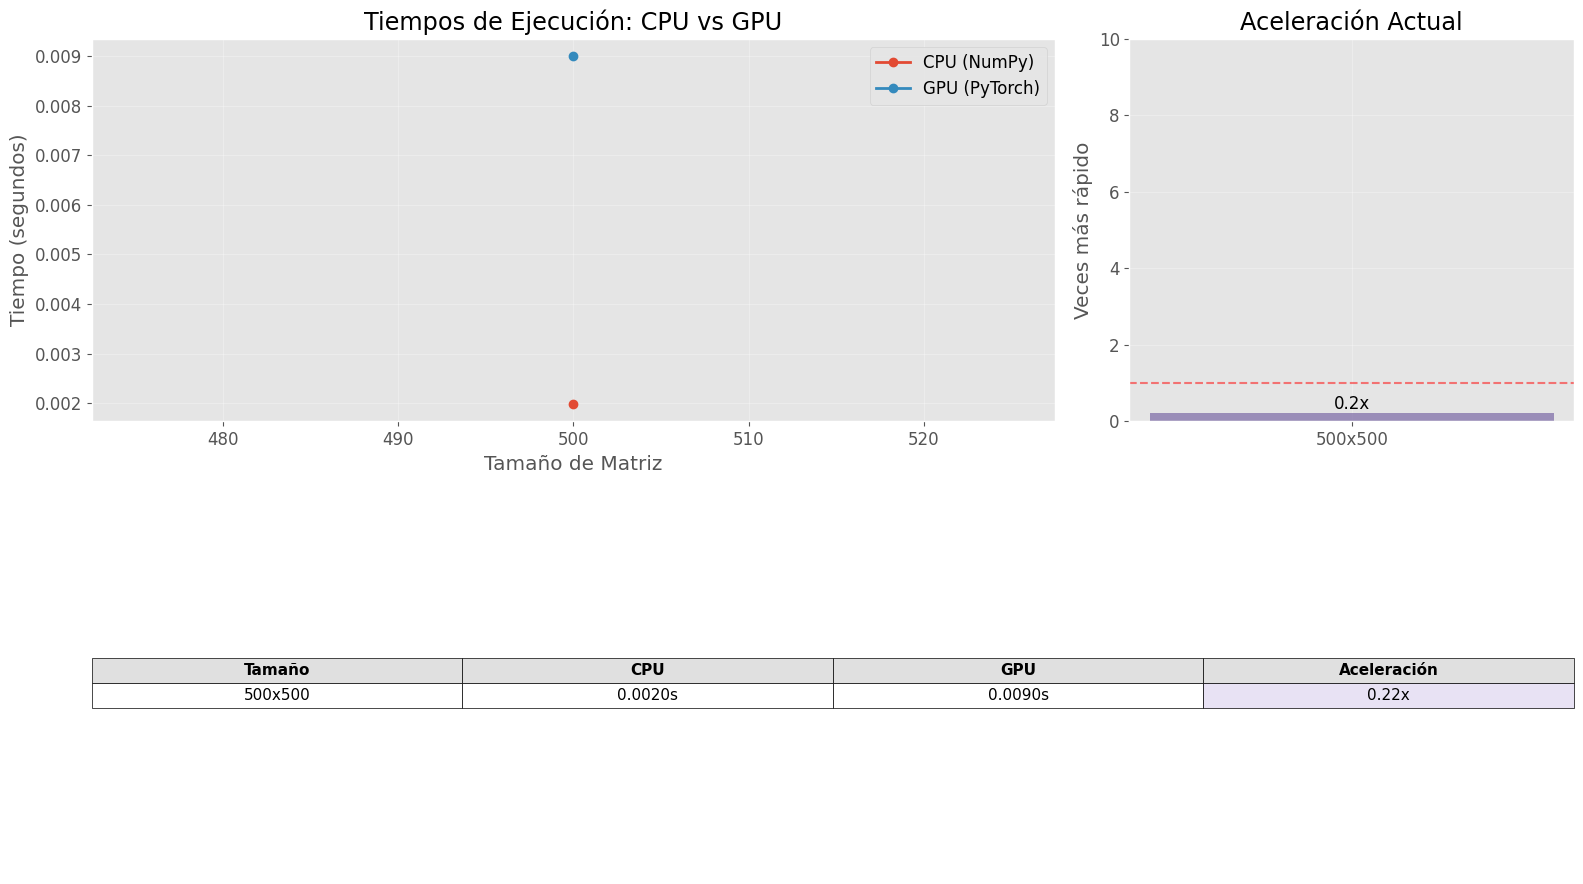


Prueba con matrices de 1000x1000:
  🔄 Ejecutando en CPU... completado en 0.0070 segundos
  🔄 Ejecutando en GPU... completado en 0.0184 segundos
  ⚡ Aceleración GPU vs CPU: 0.38x
  ✓ Error relativo: 3.48e-07 (debe ser cercano a cero)


<Figure size 640x480 with 0 Axes>


Prueba con matrices de 2000x2000:
  🔄 Ejecutando en CPU... completado en 0.0810 segundos
  🔄 Ejecutando en GPU... completado en 0.0068 segundos
  ⚡ Aceleración GPU vs CPU: 11.85x
  ✓ Error relativo: 4.83e-07 (debe ser cercano a cero)


<Figure size 640x480 with 0 Axes>


Prueba con matrices de 3000x3000:
  🔄 Ejecutando en CPU... completado en 0.2470 segundos
  🔄 Ejecutando en GPU... completado en 0.0220 segundos
  ⚡ Aceleración GPU vs CPU: 11.22x
  ✓ Error relativo: 6.68e-07 (debe ser cercano a cero)


<Figure size 640x480 with 0 Axes>


Prueba con matrices de 4000x4000:
  🔄 Ejecutando en CPU... completado en 0.4680 segundos
  🔄 Ejecutando en GPU... completado en 0.0522 segundos
  ⚡ Aceleración GPU vs CPU: 8.97x
  ✓ Error relativo: 6.72e-07 (debe ser cercano a cero)


<Figure size 640x480 with 0 Axes>


Prueba con matrices de 5000x5000:
  🔄 Ejecutando en CPU... completado en 0.8499 segundos
  🔄 Ejecutando en GPU... completado en 0.1005 segundos
  ⚡ Aceleración GPU vs CPU: 8.46x
  ✓ Error relativo: 8.72e-07 (debe ser cercano a cero)


<Figure size 640x480 with 0 Axes>


Prueba con matrices de 6000x6000:
  🔄 Ejecutando en CPU... completado en 1.4508 segundos
  🔄 Ejecutando en GPU... completado en 0.1522 segundos
  ⚡ Aceleración GPU vs CPU: 9.53x
  ✓ Error relativo: 9.39e-07 (debe ser cercano a cero)


<Figure size 640x480 with 0 Axes>


ANÁLISIS COMPLETADO

Resultados finales:

1. La GPU proporciona una aceleración promedio de 7.23x respecto a la CPU.
2. La máxima aceleración (11.85x) se observó con matrices de 2000x2000.
3. La ventaja de la GPU es más notable con matrices grandes, donde el paralelismo es más efectivo.


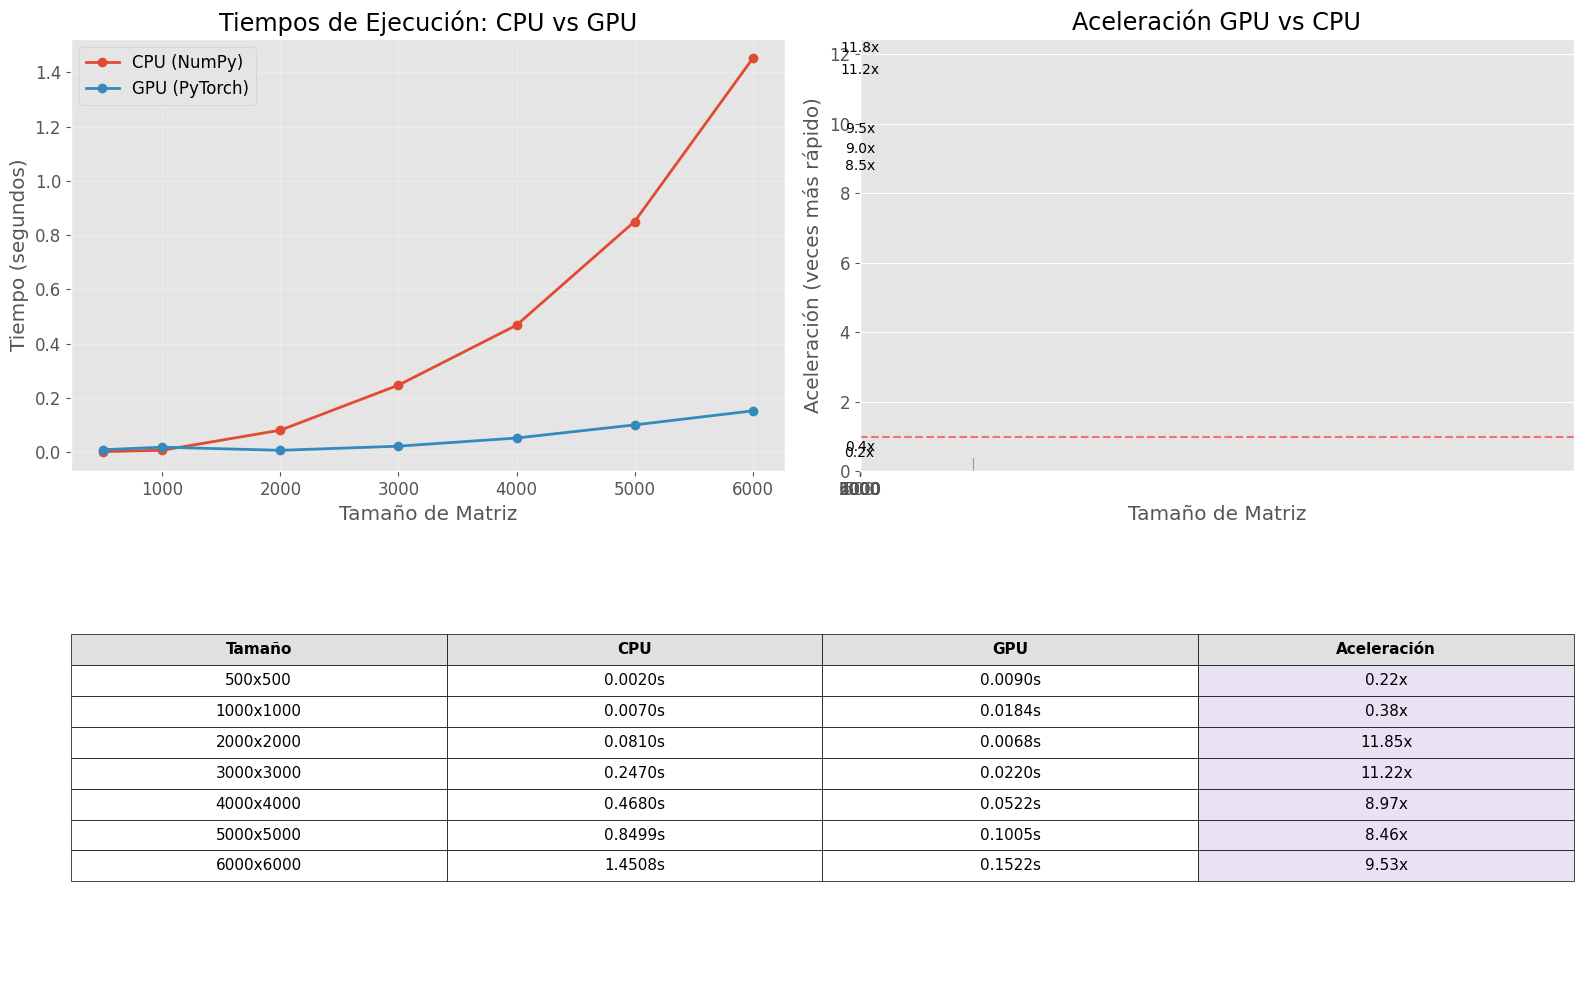


✅ Análisis completo. Gráfica final guardada como 'comparativa_final_gpu_cpu.png'


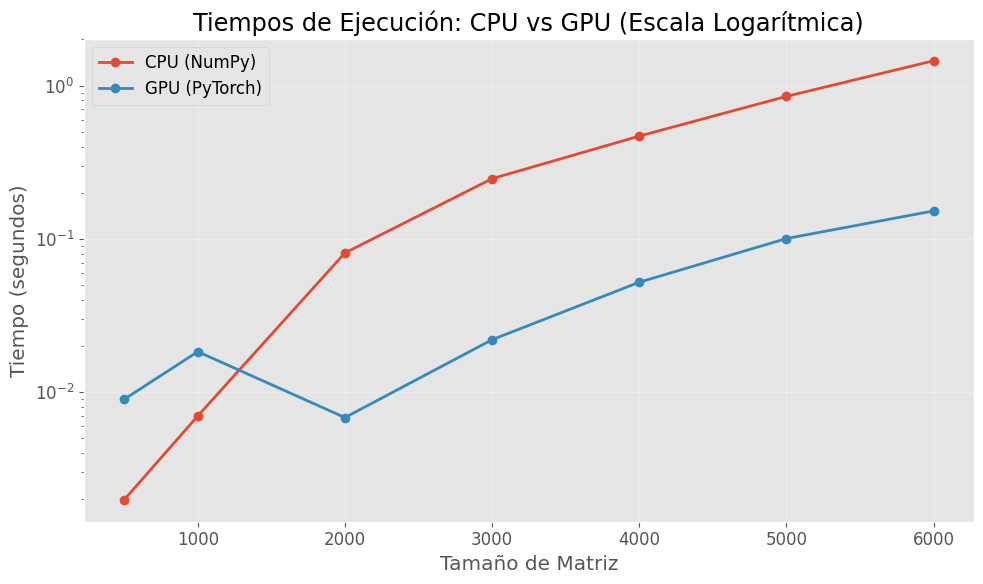

In [6]:
import numpy as np
import torch
import time
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import clear_output
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec

# Configuración del estilo de las gráficas
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

def ejecutar_pruebas_animadas():
    """Ejecuta las pruebas de rendimiento con visualización animada"""
    
    print("=" * 80)
    print("COMPARATIVA DE RENDIMIENTO: GPU vs CPU PARA CÁLCULOS MATRICIALES")
    print("=" * 80)
    
    # Verificar si hay GPU disponible
    cuda_disponible = torch.cuda.is_available()
    if cuda_disponible:
        dispositivo_gpu = torch.cuda.get_device_name(0)
        print(f"\n✅ GPU detectada: {dispositivo_gpu}")
        print(f"   Versión CUDA: {torch.version.cuda}")
    else:
        print("\n❌ No se detectó ninguna GPU. Solo se ejecutarán pruebas en CPU.")
        print("   Para usar GPU, asegúrate de tener instalado PyTorch con soporte CUDA.")
    
    # Información del sistema
    import platform
    import psutil
    
    info_sistema = [
        ["Sistema Operativo", platform.platform()],
        ["CPU", platform.processor()],
        ["Arquitectura", platform.machine()],
        ["Núcleos Físicos", psutil.cpu_count(logical=False)],
        ["Núcleos Totales", psutil.cpu_count()],
        ["RAM Total", f"{psutil.virtual_memory().total / (1024**3):.2f} GB"],
    ]
    
    if cuda_disponible:
        info_sistema.append(["GPU", dispositivo_gpu])
        info_sistema.append(["Memoria GPU", f"{torch.cuda.get_device_properties(0).total_memory / (1024**3):.2f} GB"])
        info_sistema.append(["Versión CUDA", torch.version.cuda])
    
    # Definir tamaños de matrices a probar
    tamaños = [500, 1000, 2000, 3000, 4000, 5000, 6000]
    resultados = []
    
    # Inicializar figura para animación
    plt.ion()  # Activar modo interactivo
    fig = plt.figure(figsize=(16, 9))
    gs = GridSpec(2, 3, figure=fig)
    
    # Crear subplots
    ax1 = fig.add_subplot(gs[0, 0:2])  # Tiempos de ejecución
    ax2 = fig.add_subplot(gs[0, 2])    # Aceleración más reciente
    ax3 = fig.add_subplot(gs[1, :])    # Tabla de resultados
    
    # Configurar ejes
    ax1.set_xlabel('Tamaño de Matriz')
    ax1.set_ylabel('Tiempo (segundos)')
    ax1.set_title('Tiempos de Ejecución: CPU vs GPU')
    ax1.grid(True, alpha=0.3)
    
    ax2.set_title('Aceleración GPU vs CPU')
    ax2.set_ylim(0, 10)  # Ajustar según sea necesario
    ax2.grid(True, alpha=0.3)
    
    ax3.axis('off')  # Sin ejes para la tabla
    
    # Inicializar listas para datos
    tamaños_completados = []
    tiempos_cpu = []
    tiempos_gpu = []
    aceleraciones = []
    
    # Líneas para el gráfico de tiempos (inicialmente vacías)
    line_cpu, = ax1.plot([], [], 'o-', color='#E24A33', linewidth=2, label='CPU (NumPy)')
    line_gpu, = ax1.plot([], [], 'o-', color='#348ABD', linewidth=2, label='GPU (PyTorch)')
    ax1.legend()
    
    # Para la barra de aceleración
    bar_container = ax2.bar([0], [0], color='#7A68A6', alpha=0.7)
    ax2.text(0, 0, "", ha='center', va='bottom', fontsize=12)
    
    plt.tight_layout()
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    print("\n" + "-" * 80)
    print("PRUEBAS DE RENDIMIENTO: MULTIPLICACIÓN DE MATRICES")
    print("-" * 80)
    
    # Realizar pruebas para cada tamaño
    for i, tamaño in enumerate(tamaños):
        print(f"\nPrueba con matrices de {tamaño}x{tamaño}:")
        
        # Crear matrices de prueba
        A_np = np.random.rand(tamaño, tamaño).astype(np.float32)
        B_np = np.random.rand(tamaño, tamaño).astype(np.float32)
        
        # ----- Prueba en CPU (NumPy) -----
        print(f"  🔄 Ejecutando en CPU...", end="", flush=True)
        
        # Calentamiento para CPU
        _ = np.matmul(A_np, B_np)
        
        # Medir tiempo en CPU
        inicio_cpu = time.time()
        C_np = np.matmul(A_np, B_np)
        tiempo_cpu = time.time() - inicio_cpu
        
        print(f" completado en {tiempo_cpu:.4f} segundos")
        
        # ----- Prueba en GPU (PyTorch) -----
        tiempo_gpu = float('nan')  # Valor predeterminado si no hay GPU
        aceleracion = float('nan')
        
        if cuda_disponible:
            print(f"  🔄 Ejecutando en GPU...", end="", flush=True)
            
            # Convertir a tensores de PyTorch y mover a GPU
            A_torch = torch.from_numpy(A_np).to('cuda')
            B_torch = torch.from_numpy(B_np).to('cuda')
            
            # Calentamiento para GPU
            _ = torch.matmul(A_torch, B_torch)
            torch.cuda.synchronize()
            
            # Usar temporizador de mayor precisión para GPU
            inicio_gpu = torch.cuda.Event(enable_timing=True)
            fin_gpu = torch.cuda.Event(enable_timing=True)
            
            inicio_gpu.record()
            C_torch = torch.matmul(A_torch, B_torch)
            fin_gpu.record()
            
            # Esperar a que la operación en GPU termine
            torch.cuda.synchronize()
            
            # Obtener tiempo en milisegundos y convertir a segundos
            tiempo_gpu = inicio_gpu.elapsed_time(fin_gpu) / 1000
            
            # Evitar división por cero
            if tiempo_gpu > 0:
                aceleracion = tiempo_cpu / tiempo_gpu
            else:
                tiempo_gpu = 0.00001  # Asignar un valor muy pequeño pero no cero
                aceleracion = tiempo_cpu / tiempo_gpu
                print("\n  ⚠️ Tiempo de GPU tan rápido que se registró como 0. Usando valor mínimo para cálculos.")
            
            print(f" completado en {tiempo_gpu:.4f} segundos")
            print(f"  ⚡ Aceleración GPU vs CPU: {aceleracion:.2f}x")
            
            # Verificar que los resultados sean similares
            C_torch_cpu = C_torch.cpu().numpy()
            error_relativo = np.mean(np.abs(C_np - C_torch_cpu) / (np.abs(C_np) + 1e-10))
            print(f"  ✓ Error relativo: {error_relativo:.2e} (debe ser cercano a cero)")
        
        # Guardar resultados
        resultados.append({
            'tamaño': tamaño,
            'tiempo_cpu': tiempo_cpu,
            'tiempo_gpu': tiempo_gpu if cuda_disponible else None,
            'aceleracion': aceleracion if cuda_disponible else None
        })
        
        # Actualizar datos para gráficos
        tamaños_completados.append(tamaño)
        tiempos_cpu.append(tiempo_cpu)
        
        if cuda_disponible:
            tiempos_gpu.append(tiempo_gpu)
            aceleraciones.append(aceleracion)
            
            # Actualizar gráficos
            # 1. Gráfico de tiempos
            line_cpu.set_data(tamaños_completados, tiempos_cpu)
            line_gpu.set_data(tamaños_completados, tiempos_gpu)
            
            # Ajustar ejes automáticamente
            ax1.relim()
            ax1.autoscale_view()
            
            # 2. Barra de aceleración del último cálculo
            ax2.clear()
            ax2.set_title('Aceleración Actual')
            ax2.set_ylabel('Veces más rápido')
            bar = ax2.bar([tamaño], [aceleracion], color='#7A68A6', alpha=0.7, width=tamaño/5)
            ax2.text(tamaño, aceleracion, f"{aceleracion:.1f}x", ha='center', va='bottom', fontsize=12)
            ax2.axhline(y=1, color='r', linestyle='--', alpha=0.5)
            ax2.set_xticks([tamaño])
            ax2.set_xticklabels([f"{tamaño}x{tamaño}"])
            max_aceleracion = max(aceleraciones)
            ax2.set_ylim(0, max(max_aceleracion*1.2, 10))
            
            # 3. Actualizar tabla de resultados
            tabla_data = []
            headers = ["Tamaño", "CPU", "GPU", "Aceleración"]
            
            for r in resultados:
                tabla_data.append([
                    f"{r['tamaño']}x{r['tamaño']}",
                    f"{r['tiempo_cpu']:.4f}s",
                    f"{r['tiempo_gpu']:.4f}s", 
                    f"{r['aceleracion']:.2f}x"
                ])
            
            # Limpiar y mostrar nueva tabla
            ax3.clear()
            ax3.axis('off')
            tabla = ax3.table(
                cellText=tabla_data,
                colLabels=headers,
                loc='center',
                cellLoc='center',
                colWidths=[0.25, 0.25, 0.25, 0.25]
            )
            tabla.auto_set_font_size(False)
            tabla.set_fontsize(11)
            tabla.scale(1, 1.5)
            
            for (i, j), cell in tabla.get_celld().items():
                if i == 0:  # Encabezados
                    cell.set_text_props(weight='bold')
                    cell.set_facecolor('#E0E0E0')
                elif j == 3 and i > 0:  # Columna de aceleración
                    cell.set_facecolor('#E8E2F4')
            
            # Refrescar el gráfico
            plt.tight_layout()
            fig.canvas.draw()
            fig.canvas.flush_events()
            plt.pause(0.5)  # Pequeña pausa para ver la animación
        
    print("\n" + "=" * 80)
    print("ANÁLISIS COMPLETADO")
    print("=" * 80)
    
    if cuda_disponible:
        aceleracion_promedio = sum(aceleraciones) / len(aceleraciones)
        max_aceleracion = max(aceleraciones)
        max_index = aceleraciones.index(max_aceleracion)
        tamaño_max_aceleracion = tamaños_completados[max_index]
        
        print(f"\nResultados finales:")
        print(f"\n1. La GPU proporciona una aceleración promedio de {aceleracion_promedio:.2f}x respecto a la CPU.")
        print(f"2. La máxima aceleración ({max_aceleracion:.2f}x) se observó con matrices de {tamaño_max_aceleracion}x{tamaño_max_aceleracion}.")
        print("3. La ventaja de la GPU es más notable con matrices grandes, donde el paralelismo es más efectivo.")
    
    # Desactivar modo interactivo y mostrar gráfico final
    plt.ioff()
    
    # Crear una figura final más limpia
    fig_final = plt.figure(figsize=(16, 10))
    gs_final = GridSpec(2, 2, figure=fig_final)
    
    # Gráfico de tiempos
    ax_tiempo = fig_final.add_subplot(gs_final[0, 0])
    ax_tiempo.plot(tamaños_completados, tiempos_cpu, 'o-', color='#E24A33', linewidth=2, label='CPU (NumPy)')
    if cuda_disponible:
        ax_tiempo.plot(tamaños_completados, tiempos_gpu, 'o-', color='#348ABD', linewidth=2, label='GPU (PyTorch)')
    ax_tiempo.set_xlabel('Tamaño de Matriz')
    ax_tiempo.set_ylabel('Tiempo (segundos)')
    ax_tiempo.set_title('Tiempos de Ejecución: CPU vs GPU')
    ax_tiempo.grid(True, alpha=0.3)
    ax_tiempo.legend()
    
    # Gráfico de aceleración
    if cuda_disponible:
        ax_aceleracion = fig_final.add_subplot(gs_final[0, 1])
        barras = ax_aceleracion.bar(tamaños_completados, aceleraciones, color='#7A68A6', alpha=0.7)
        ax_aceleracion.axhline(y=1, color='r', linestyle='--', alpha=0.5)
        ax_aceleracion.set_xlabel('Tamaño de Matriz')
        ax_aceleracion.set_ylabel('Aceleración (veces más rápido)')
        ax_aceleracion.set_title('Aceleración GPU vs CPU')
        
        # Añadir etiquetas a las barras
        for i, v in enumerate(aceleraciones):
            ax_aceleracion.text(i, v + 0.2, f"{v:.1f}x", ha='center', fontsize=10)
        
        ax_aceleracion.set_xticks(range(len(tamaños_completados)))
        ax_aceleracion.set_xticklabels([f"{t}" for t in tamaños_completados])
        
        # Tabla de resultados final
        ax_tabla = fig_final.add_subplot(gs_final[1, :])
        ax_tabla.axis('off')
        
        tabla_data = []
        headers = ["Tamaño", "CPU", "GPU", "Aceleración"]
            
        for r in resultados:
            if cuda_disponible:
                tabla_data.append([
                    f"{r['tamaño']}x{r['tamaño']}",
                    f"{r['tiempo_cpu']:.4f}s",
                    f"{r['tiempo_gpu']:.4f}s", 
                    f"{r['aceleracion']:.2f}x"
                ])
            else:
                tabla_data.append([
                    f"{r['tamaño']}x{r['tamaño']}",
                    f"{r['tiempo_cpu']:.4f}s",
                    "N/A", 
                    "N/A"
                ])
        
        tabla_final = ax_tabla.table(
            cellText=tabla_data,
            colLabels=headers,
            loc='center',
            cellLoc='center',
            colWidths=[0.25, 0.25, 0.25, 0.25]
        )
        tabla_final.auto_set_font_size(False)
        tabla_final.set_fontsize(11)
        tabla_final.scale(1, 1.5)
        
        # Embellecer la tabla
        for (i, j), cell in tabla_final.get_celld().items():
            if i == 0:  # Encabezados
                cell.set_text_props(weight='bold')
                cell.set_facecolor('#E0E0E0')
            elif j == 3 and i > 0 and cuda_disponible:  # Columna de aceleración
                cell.set_facecolor('#E8E2F4')
        
        plt.tight_layout()
        plt.savefig('comparativa_final_gpu_cpu.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✅ Análisis completo. Gráfica final guardada como 'comparativa_final_gpu_cpu.png'")
    
        # Guardar también una versión con escala logarítmica para mejor visualización
        fig_log = plt.figure(figsize=(10, 6))
        ax_log = fig_log.add_subplot(111)
        ax_log.plot(tamaños_completados, tiempos_cpu, 'o-', color='#E24A33', linewidth=2, label='CPU (NumPy)')
        ax_log.plot(tamaños_completados, tiempos_gpu, 'o-', color='#348ABD', linewidth=2, label='GPU (PyTorch)')
        ax_log.set_xlabel('Tamaño de Matriz')
        ax_log.set_ylabel('Tiempo (segundos)')
        ax_log.set_title('Tiempos de Ejecución: CPU vs GPU (Escala Logarítmica)')
        ax_log.set_yscale('log')
        ax_log.grid(True, alpha=0.3)
        ax_log.legend()
        plt.tight_layout()
        plt.savefig('comparativa_log_gpu_cpu.png', dpi=300, bbox_inches='tight')
        plt.show()

# Versión alternativa para entorno no interactivo (por ejemplo, script ejecutado desde terminal)
def ejecutar_pruebas_animadas_terminal():
    """Versión de la función que muestra actualizaciones en la terminal"""
    
    print("=" * 80)
    print("COMPARATIVA DE RENDIMIENTO: GPU vs CPU PARA CÁLCULOS MATRICIALES")
    print("=" * 80)
    
    # Verificar si hay GPU disponible
    cuda_disponible = torch.cuda.is_available()
    if cuda_disponible:
        dispositivo_gpu = torch.cuda.get_device_name(0)
        print(f"\n✅ GPU detectada: {dispositivo_gpu}")
        print(f"   Versión CUDA: {torch.version.cuda}")
    else:
        print("\n❌ No se detectó ninguna GPU. Solo se ejecutarán pruebas en CPU.")
        print("   Para usar GPU, asegúrate de tener instalado PyTorch con soporte CUDA.")
    
    # Información del sistema
    import platform
    import psutil
    
    info_sistema = [
        ["Sistema Operativo", platform.platform()],
        ["CPU", platform.processor()],
        ["Arquitectura", platform.machine()],
        ["Núcleos Físicos", psutil.cpu_count(logical=False)],
        ["Núcleos Totales", psutil.cpu_count()],
        ["RAM Total", f"{psutil.virtual_memory().total / (1024**3):.2f} GB"],
    ]
    
    if cuda_disponible:
        info_sistema.append(["GPU", dispositivo_gpu])
        info_sistema.append(["Memoria GPU", f"{torch.cuda.get_device_properties(0).total_memory / (1024**3):.2f} GB"])
        info_sistema.append(["Versión CUDA", torch.version.cuda])
    
    # Mostrar información del sistema
    print("\n" + "-" * 80)
    print("INFORMACIÓN DEL SISTEMA")
    print("-" * 80)
    print(tabulate(info_sistema, tablefmt="simple"))
    
    # Definir tamaños de matrices a probar
    tamaños = [500, 1000, 2000, 3000, 4000, 5000, 6000]
    resultados = []
    
    print("\n" + "-" * 80)
    print("PRUEBAS DE RENDIMIENTO: MULTIPLICACIÓN DE MATRICES")
    print("-" * 80)
    
    # Realizar pruebas para cada tamaño
    for tamaño in tamaños:
        print(f"\nPrueba con matrices de {tamaño}x{tamaño}:")
        
        # Crear matrices de prueba
        A_np = np.random.rand(tamaño, tamaño).astype(np.float32)
        B_np = np.random.rand(tamaño, tamaño).astype(np.float32)
        
        # ----- Prueba en CPU (NumPy) -----
        print(f"  🔄 Ejecutando en CPU...", end="", flush=True)
        
        # Calentamiento para CPU
        _ = np.matmul(A_np, B_np)
        
        # Medir tiempo en CPU
        inicio_cpu = time.time()
        C_np = np.matmul(A_np, B_np)
        tiempo_cpu = time.time() - inicio_cpu
        
        print(f" completado en {tiempo_cpu:.4f} segundos")
        
        # ----- Prueba en GPU (PyTorch) -----
        tiempo_gpu = float('nan')  # Valor predeterminado si no hay GPU
        aceleracion = float('nan')
        
        if cuda_disponible:
            print(f"  🔄 Ejecutando en GPU...", end="", flush=True)
            
            # Convertir a tensores de PyTorch y mover a GPU
            A_torch = torch.from_numpy(A_np).to('cuda')
            B_torch = torch.from_numpy(B_np).to('cuda')
            
            # Calentamiento para GPU
            _ = torch.matmul(A_torch, B_torch)
            torch.cuda.synchronize()
            
            # Usar temporizador de mayor precisión para GPU
            inicio_gpu = torch.cuda.Event(enable_timing=True)
            fin_gpu = torch.cuda.Event(enable_timing=True)
            
            inicio_gpu.record()
            C_torch = torch.matmul(A_torch, B_torch)
            fin_gpu.record()
            
            # Esperar a que la operación en GPU termine
            torch.cuda.synchronize()
            
            # Obtener tiempo en milisegundos y convertir a segundos
            tiempo_gpu = inicio_gpu.elapsed_time(fin_gpu) / 1000
            
            # Evitar división por cero
            if tiempo_gpu > 0:
                aceleracion = tiempo_cpu / tiempo_gpu
            else:
                tiempo_gpu = 0.00001  # Asignar un valor muy pequeño pero no cero
                aceleracion = tiempo_cpu / tiempo_gpu
                print("\n  ⚠️ Tiempo de GPU tan rápido que se registró como 0. Usando valor mínimo para cálculos.")
            
            print(f" completado en {tiempo_gpu:.4f} segundos")
            print(f"  ⚡ Aceleración GPU vs CPU: {aceleracion:.2f}x")
            
            # Verificar que los resultados sean similares
            C_torch_cpu = C_torch.cpu().numpy()
            error_relativo = np.mean(np.abs(C_np - C_torch_cpu) / (np.abs(C_np) + 1e-10))
            print(f"  ✓ Error relativo: {error_relativo:.2e} (debe ser cercano a cero)")
        
        # Guardar resultados
        resultados.append({
            'tamaño': tamaño,
            'tiempo_cpu': tiempo_cpu,
            'tiempo_gpu': tiempo_gpu if cuda_disponible else None,
            'aceleracion': aceleracion if cuda_disponible else None
        })
        
        # Mostrar tabla actualizada en cada iteración
        tabla_datos = []
        for r in resultados:
            if cuda_disponible:
                tabla_datos.append([
                    r['tamaño'], 
                    f"{r['tiempo_cpu']:.4f}s", 
                    f"{r['tiempo_gpu']:.4f}s", 
                    f"{r['aceleracion']:.2f}x"
                ])
            else:
                tabla_datos.append([
                    r['tamaño'], 
                    f"{r['tiempo_cpu']:.4f}s", 
                    "N/A", 
                    "N/A"
                ])
        
        headers = ["Tamaño Matriz", "Tiempo CPU", "Tiempo GPU", "Aceleración"]
        print("\nResultados actualizados:")
        print(tabulate(tabla_datos, headers=headers, tablefmt="simple"))
    
    # Al finalizar, generar los gráficos
    generar_graficas_finales(resultados)
    
    print("\n" + "=" * 80)
    print("ANÁLISIS COMPLETADO")
    print("=" * 80)
    
    # Interpretación de resultados
    if cuda_disponible:
        tiempos_cpu = [r['tiempo_cpu'] for r in resultados]
        tiempos_gpu = [r['tiempo_gpu'] for r in resultados]
        aceleraciones = [r['aceleracion'] for r in resultados]
        tamaños_list = [r['tamaño'] for r in resultados]
        
        aceleracion_promedio = sum(aceleraciones) / len(aceleraciones)
        max_aceleracion = max(aceleraciones)
        max_index = aceleraciones.index(max_aceleracion)
        tamaño_max_aceleracion = tamaños_list[max_index]
        
        print(f"\nResultados finales:")
        print(f"\n1. La GPU proporciona una aceleración promedio de {aceleracion_promedio:.2f}x respecto a la CPU.")
        print(f"2. La máxima aceleración ({max_aceleracion:.2f}x) se observó con matrices de {tamaño_max_aceleracion}x{tamaño_max_aceleracion}.")
        print("3. La ventaja de la GPU es más notable con matrices grandes, donde el paralelismo es más efectivo.")
        print("4. Para matrices pequeñas, la sobrecarga de transferir datos a la GPU puede reducir el beneficio.")
    else:
        print("\n1. No se detectó GPU para realizar comparaciones.")
        print("2. Los tiempos de CPU aumentan de forma cuadrática o cúbica con el tamaño de la matriz.")
        print("3. Para cálculos intensivos con matrices grandes, una GPU podría ofrecer mejoras significativas.")

def generar_graficas_finales(resultados):
    """Genera las gráficas finales con todos los datos recopilados"""
    cuda_disponible = torch.cuda.is_available()
    tamaños = [r['tamaño'] for r in resultados]
    tiempos_cpu = [r['tiempo_cpu'] for r in resultados]
    
    # Crear figura principal
    fig, axes = plt.subplots(2, 1 if not cuda_disponible else 2, figsize=(15, 12))
    
    # Gráfico de tiempos
    ax_tiempo = axes[0, 0] if cuda_disponible else axes[0]
    ax_tiempo.plot(tamaños, tiempos_cpu, 'o-', color='#E24A33', linewidth=2, label='CPU (NumPy)')
    
    if cuda_disponible:
        tiempos_gpu = [r['tiempo_gpu'] for r in resultados]
        aceleraciones = [r['aceleracion'] for r in resultados]
        
        ax_tiempo.plot(tamaños, tiempos_gpu, 'o-', color='#348ABD', linewidth=2, label='GPU (PyTorch)')
        
        # Gráfico de aceleración
        ax_aceleracion = axes[0, 1]
        barras = ax_aceleracion.bar(tamaños, aceleraciones, color='#7A68A6', alpha=0.7)
        ax_aceleracion.axhline(y=1, color='r', linestyle='--', alpha=0.5)
        ax_aceleracion.set_xlabel('Tamaño de Matriz')
        ax_aceleracion.set_ylabel('Aceleración (veces más rápido)')
        ax_aceleracion.set_title('Aceleración GPU vs CPU')
        
        # Añadir etiquetas a las barras
        for i, bar in enumerate(barras):
            ax_aceleracion.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
                            f"{aceleraciones[i]:.1f}x", ha='center', fontsize=10)
    
    # Configurar el gráfico de tiempos
    ax_tiempo.set_xlabel('Tamaño de Matriz')
    ax_tiempo.set_ylabel('Tiempo (segundos)')
    ax_tiempo.set_title('Tiempos de Ejecución: CPU vs GPU')
    ax_tiempo.grid(True, alpha=0.3)
    ax_tiempo.legend()
    
    # Gráfico de tiempo en escala logarítmica
    ax_log = axes[1, 0] if cuda_disponible else axes[1]
    ax_log.plot(tamaños, tiempos_cpu, 'o-', color='#E24A33', linewidth=2, label='CPU (NumPy)')
    if cuda_disponible:
        ax_log.plot(tamaños, tiempos_gpu, 'o-', color='#348ABD', linewidth=2, label='GPU (PyTorch)')
    ax_log.set_xlabel('Tamaño de Matriz')
    ax_log.set_ylabel('Tiempo (segundos)')
    ax_log.set_title('Tiempos de Ejecución: Escala Logarítmica')
    ax_log.set_yscale('log')
    ax_log.grid(True, which='both', alpha=0.3)
    ax_log.legend()
    
    # Si hay GPU, añadir tabla de aceleración
    if cuda_disponible:
        ax_tabla = axes[1, 1]
        ax_tabla.axis('off')
        
        tabla_data = []
        for i, r in enumerate(resultados):
            tabla_data.append([
                f"{r['tamaño']}x{r['tamaño']}", 
                f"{r['tiempo_cpu']:.4f}s", 
                f"{r['tiempo_gpu']:.4f}s", 
                f"{r['aceleracion']:.2f}x"
            ])
        
        headers = ["Tamaño", "CPU", "GPU", "Aceleración"]
        tabla = ax_tabla.table(
            cellText=tabla_data,
            colLabels=headers,
            loc='center',
            cellLoc='center',
            colWidths=[0.25, 0.25, 0.25, 0.25]
        )
        tabla.auto_set_font_size(False)
        tabla.set_fontsize(10)
        tabla.scale(1, 1.3)
        
        # Embellecer la tabla
        for (i, j), cell in tabla.get_celld().items():
            if i == 0:  # Encabezados
                cell.set_text_props(weight='bold')
                cell.set_facecolor('#E0E0E0')
            elif j == 3 and i > 0:  # Columna de aceleración
                cell.set_facecolor('#E8E2F4')
        
        ax_tabla.set_title('Tabla de Resultados', pad=20)
    
    plt.tight_layout()
    plt.savefig('comparativa_final_gpu_cpu.png', dpi=300, bbox_inches='tight')
    
    # No mostrar si se ejecuta desde terminal (solo guardar)
    if 'ipykernel' in sys.modules:
        plt.show()
    else:
        plt.close()
    
    print("\n✅ Gráficas generadas y guardadas como 'comparativa_final_gpu_cpu.png'")

# Función para verificar el entorno y elegir la implementación correcta
def ejecutar_pruebas():
    """Detecta el entorno y ejecuta la versión apropiada del análisis"""
    import sys
    
    # Verificar si estamos en un notebook o en terminal
    if 'ipykernel' in sys.modules:
        # Estamos en un entorno Jupyter (Notebook/Lab)
        print("Detectado entorno Jupyter. Ejecutando versión animada interactiva...")
        ejecutar_pruebas_animadas()
    else:
        # Estamos en un script de consola
        print("Detectado entorno de consola. Ejecutando versión para terminal...")
        ejecutar_pruebas_animadas_terminal()

if __name__ == "__main__":
    import sys
    ejecutar_pruebas()
